Por último notamos que, aunque el error de redondeo es pequeño al principio, en calculos complejos puede acumulares para ocacionar efectos **catastroficos**.

**EJEMPLO 1:**  Explosión del misil Ariane en Junio de 1996 por un **desbordamiento por exceso** en el computador del mismo. 
https://www-users.math.umn.edu/~arnold/disasters/ariane.html

**EJEMPLO 2:** La falla de una misión de un misil *American Patriot* durante la guerra del Golfo en 1991 debido a **errores de redondeo** en el cálculo de la trayectoria a seguir. 
http://www-users.math.umn.edu/~arnold/disasters/patriot.html

# Problemas

**PROBLEMA 1** Explique la falla del Ariane. Muestre cálculos numéricos para soportar su explicación.


Un número que debia ser de 64 bits fue convertido por error a un número de 16 bits. El número era mayor que el mayor número representable por un número de 16 bits causando un overflow, lo que hizo que el programa que controla el cohete fallara. 

In [ ]:
import numpy as np
x = float(42032.5) #64 bits
print(x)
y = np.int16(x) #16 bits
print(y)

42032.5
-23504


Vemos que el error en la conversión es muy grande

**PROBLEMA 2**  Explicar la falla del American Patriot. Muestre cálculos numéricos para soportar su explicación.

El sistema para interceptar el misil hacia una multiplicación por 1/10 para hacer conversión de tiempos. 1/10 no es representable en binario, entonces como el sistema usaba 24 bits para este número y fue multiplicado por el reloj interno de la bateria anti misiles y esta llevaba encendida mucho tiempo, provocó un error de 0.34 s en el cálculo que fue suficiente para fallar la intercepción del misil enemigo. 

In [ ]:
t = 120947392.3 #tiempo en s
dt64 = np.float64(1.0/10) #64 bits
dt32 = np.float32(1.0/10) #32 bits
D = abs(t*dt64 - t*dt32)
print(D)

0.18022565729916096


Inclusive con 32 bits se consigue una diferencia apreciable. El misil BGM-109 Tomahawk, que es uno de los más utilizados en el mundo, se mueve a una velocidad promedio de 880 km/h. en 0.18 s el misil avanzó 44 m. Distancia más que suficiente para que el misil interceptor falle su objetivo.


**PROBLEMA 3** Ensaye calcular las funciones $$f(x)=\sqrt{x^2+1}-1 \quad g(x)=\frac{x^2}{\sqrt{x^2+1}+1}$$
Use valores pequeños como $x=8^{-1},8^{-2},8^{-3},\dots$. Explique los resultados. Note que, análiticamete,  $f(x)=g(x)$.


In [ ]:
import math
import numpy as np
from matplotlib import pyplot as plt

def f(x):
  return np.sqrt(x**2+1)-1

def g(x):
  return x**2/(np.sqrt(x**2+1)+1)

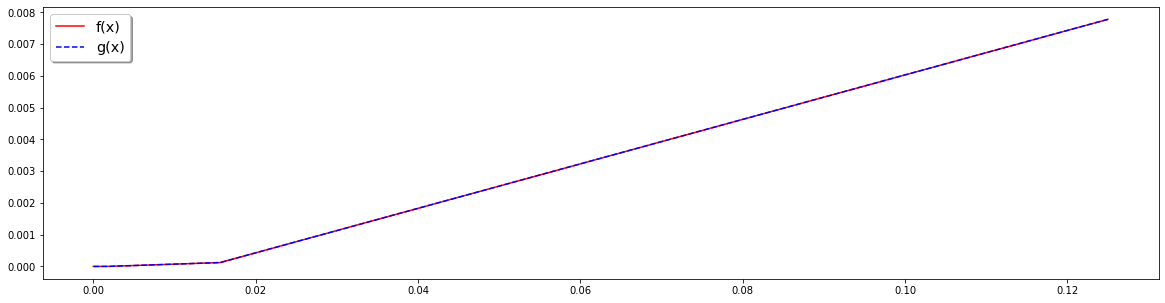

In [ ]:
y = []
for i in range(1,20):
  y.append(8**(-i))

x = np.asarray(y)

p1 = f(x)
p2 = g(x) 

plt.figure(figsize=(20, 5))
plt.plot(x, p1, 'r-',label='f(x)')
plt.plot( x, p2, 'b--',label='g(x)')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()


In [ ]:
rows = [['f(x)','g(x)','|f(x)-g(x)|']]
for j in y:
  rows.append([f(j),g(j),abs(f(j)-g(j))])

for row in rows:
    print("{: >30} {: >30} {: >30}".format(*row))


                          f(x)                           g(x)                    |f(x)-g(x)|
         0.0077822185373186414          0.0077822185373187065          6.505213034913027e-17
        0.00012206286282867573         0.00012206286282875901          8.328027937404281e-17
        1.9073468138230965e-06          1.907346813826566e-06          3.469446951953614e-18
        2.9802321943606103e-08         2.9802321943606116e-08         1.3234889800848443e-23
         4.656612873077393e-10         4.6566128719931904e-10         1.0842021724855044e-19
         7.275957614183426e-12          7.275957614156956e-12         2.6469779601696886e-23
        1.1368683772161603e-13         1.1368683772160957e-13          6.462348535570529e-27
        1.7763568394002505e-15         1.7763568394002489e-15         1.5777218104420236e-30
                           0.0         2.7755575615628914e-17         2.7755575615628914e-17
                           0.0          4.336808689942018e-19         

Debido a errores de redondeo y de resta de números cercanos no dan resultados exactamente iguales. Sin embargo, la diferencia entre los dos está en el orden de 10^(-17). De todos modos, g(x) da resultados más precisos para x pequeños. 

**PROBLEMA 4** Repita el experimento arriba con $P(x)=(x-1)^7$. Agrege el siguiente método 
$$  P(x)= ((((((x-7)x+21)x-35)x+35)x-21)x+7)x-1 $$
Verifique esta formula. Implemente y comente los resultados. Esta forma de calcular polinimios es conocida como el esquema de Horner.


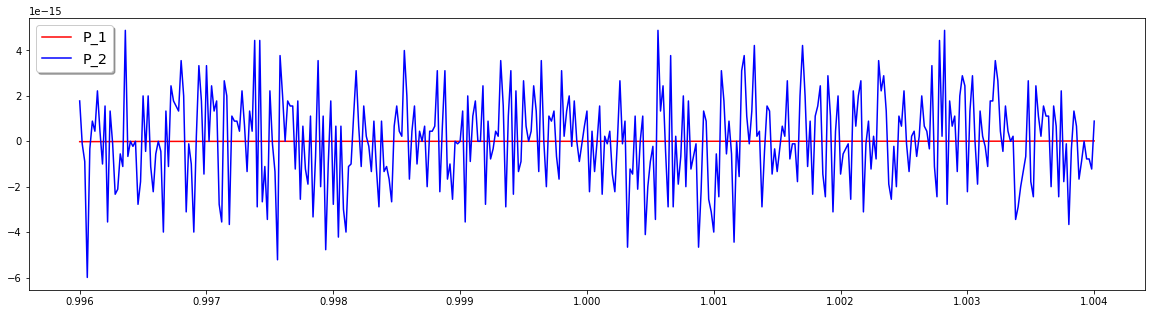

In [ ]:
def P1(x):
  return (x-1)**7

def P2(x):
  return ((((((x-7)*x+21)*x-35)*x+35)*x-21)*x+7)*x-1

a=1-4E-3
b=1+4E-3
x = np.arange(a, b, 4E-3/200)

p1 = P1(x)
p2 = P2(x) 

plt.figure(figsize=(20, 5))
plt.plot(x, p1, 'r-',label='P_1')
plt.plot( x, p2, 'b-',label='P_2')
legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.show()

**PROBLEMA 5(Stoer)** Considere los siguientes algoritmos. Algoritmo 1
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t},\quad y=-p+u  $$
y el algoritmo 2, 
$$s=p^2,\quad t=s+q,\quad u=\sqrt{t}, \quad v=p+u,\quad y=q/v $$
Escriba $y$ como función de $p$ y $q$. Compare los resutados de estos dos algoritmos cuando $p=1000$,  $q=0.0018000000081$. Explique los resultados. ¿Cuál es mas confiable para estos valores de $p$ y $q$?

In [ ]:
def algoritmo1(p,q):
  s = p**2
  t = s + q
  u = math.sqrt(t)
  return -p + u

def algoritmo2(p,q):
  s = p**2
  t = s + q
  u = math.sqrt(t)
  v = p + u
  return q/v

p = 1000
q = 0.0018000000081

print("{: >30} {: >30} {: >30}".format('Algoritmo1', 'Algoritmo2', 'Diferencia'))
print("{: >30} {: >30} {: >30}".format(algoritmo1(p,q), algoritmo2(p,q), algoritmo1(p,q)-algoritmo2(p,q)))

                    Algoritmo1                     Algoritmo2                     Diferencia
         9.000000318337698e-07              9.00000003645e-07           2.81887697583158e-14


Escribiendo y en términos de q se ve que $$y_1 = -p+\sqrt{p^2+q}$$ Para el segundo algoritmo se consigue que $$y_2=\frac{q}{p+\sqrt{p^2+q}}$$ Cuándo q tiende a 0, en el primer algoritmo se consigue una división de números cercanos que no ocurre en el segundo algoritmo. Es por esto que el segundo es más adecuado para este caso.

**PROBLEMA 6** Considere el siguiente codigo
```
x=np.sqrt(1/9)
print("x={0:.60f}".format(x))
```
que dá como resultado 
x=0.333333333333333314829616256247390992939472198486328125000000.
Usando su análisis, comente en el resultado del código siguiente
```
x=np.sqrt(0.1)
print("x={0:.60f}".format(x))
```
¿Cuántos decimales puede garantizar este cálculo?

In [ ]:
x=np.sqrt(1/9)
print("x={0:.60f}".format(x))
print(type(1/9), type(x))

x=np.sqrt(0.1)
print("x={0:.60f}".format(x))
print(type(0.1), type(x))

x=0.333333333333333314829616256247390992939472198486328125000000
<class 'float'> <class 'numpy.float64'>
x=0.316227766016837941176476078908308409154415130615234375000000
<class 'float'> <class 'numpy.float64'>


Los números de 64 bits solo pueden garantizar máximo 16 decimales. Aún así, 0.1 es un número dificil de representar, que aún con 64 bits no se puede representar perfectamente. Es por esto que no se puede confiar que este cálculo tenga 16 decimales correctos. Y absolutamente no 60 decimales. 

**PROBLEMA 7** Investigue y explique los diguientes modulos de python

In [ ]:
from decimal import *
from fractions import *

El módulo decimal crea un nuevo tipo de datos que espera mejorar la precisión del float. Por ejemplo, veamos este error común de los números floats y luego veamos como Decimal enfrenta el problema

In [ ]:
sum1 = 0.0
for i in range(0,10000):
  sum1+=0.1
print(sum1)

sum2 = Decimal(0.0)
for i in range(0,10000):
  sum2+=Decimal(0.1)
print(float(sum2))

1000.0000000001588
1000.0


Vemos inmediatamente como decimal obtiene el resultado exacto cuando lo convertimos a float. La idea es no perder precisión en las operaciones. Luego, al volver a float para seguir con el código obtenemos un resultado exacto. 

Ahora, veamos como trabaja el módulo fractions.

In [ ]:
print(Fraction(6,10))
print(Fraction(6,10)*Fraction(5,3))
print(float(Fraction(6,10)*Fraction(5,3)))

sum1 = Fraction(0.0)
for i in range(0,10000):
  sum1+=Fraction(1,10)
print(sum1)

3/5
1
1.0
1000


Vemos como este módulo permite hacer operaciones básicas de fracciones como las haría un humano con lápiz y papel. Esto tiene la ventaja de que no se pierde precisión entre operaciones pues pasamos a trabajar con números enteros.